In [14]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pathlib

# source:
# https://www.tensorflow.org/tutorials/load_data/images
#  this link also has a guide on how to create a manual tf.Data.Dataset, which is the "preprocessing" part

In [12]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

## Load images from subfolder within specified path

In [4]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


                                                  pf_dataset

In [5]:
#--- was able to load something to trial_1
my_dir = 'C:\\Users\dxoco\Desktop\IronHack\datamex_082020\pf_real_time_image_recognition'
trial_1 = tf.keras.preprocessing.image_dataset_from_directory(
  my_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 48 files belonging to 2 classes.
Using 39 files for training.


In [6]:
my_val = tf.keras.preprocessing.image_dataset_from_directory(
    my_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 48 files belonging to 2 classes.
Using 9 files for validation.


In [7]:
my_class_names = trial_1.class_names
print(my_class_names[1])

plate_numbers


## Visualize images

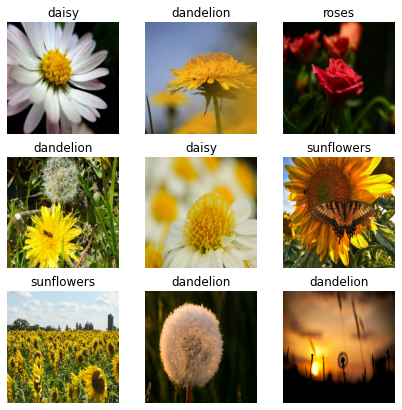

In [23]:
plt.figure(figsize=(7, 7))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

                                                  pf_dataset

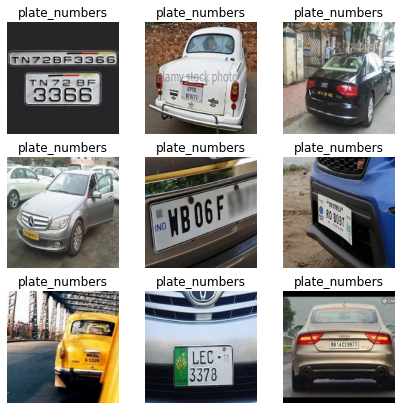

In [9]:
plt.figure(figsize=(7, 7))
for images, labels in trial_1.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(my_class_names[labels[i]])
        plt.axis("off")

In [12]:
for image_batch, labels_batch in trial_1:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


## Standarize data

This is an important step to take. It can be done previous to the model or as a layer in the model.

It will be done as a layer within the model.

## Configure dataset for efficiency

In [35]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
TUNA_2 = tf.data.experimental.AUTOTUNE

trial_1 = trial_1.cache().prefetch(buffer_size=TUNA_2)
my_val = my_val.cache().prefetch(buffer_size=TUNA_2)

                                                  pf_dataset